# Temperatura
Dada uma série de temperaturas mensais pretende-se determinar qual o trimestre em que ocorreu a temperatura mais elevada.

- O primeiro valor da série corresponde ao mês de janeiro de 2018, o segundo valor da série ao mês de fevereiro de 2018 e assim sucessivamente.
- Se existirem vários valores máximos deve ser apresentado o trimestre em que ocorreu pela primeira vez essa temperatura.
- Calcule a série de temperaturas médias mensais e identifique o trimestre com a temperatura média mais elevada.

Por exemplo, dada a seguinte série de temperaturas:

14 16 19 24 26 22 20 18 15 14 12 12 13 17 22 26 25 24 24 18 18 15 14 12

Apresente a visualização dos trimestres, identificando o trimestre máximo.

In [447]:
import pandas as pd
import plotly.graph_objects as go

In [448]:
nl_temperaturas = "14 16 19 24 26 22 20 18 15 14 12 12 13 17 22 26 25 24 24 18 18 15 14 12"

temperaturas = nl_temperaturas.split(" ")

temperaturas, len(temperaturas)

(['14',
  '16',
  '19',
  '24',
  '26',
  '22',
  '20',
  '18',
  '15',
  '14',
  '12',
  '12',
  '13',
  '17',
  '22',
  '26',
  '25',
  '24',
  '24',
  '18',
  '18',
  '15',
  '14',
  '12'],
 24)

In [449]:
# associando cada temperatura a um mês e ano. início em Janeiro de 2018
from datetime import datetime
for i in range(len(temperaturas)):
    if i < 12:
        temperaturas[i] = [int(temperaturas[i]), f"{i+1:02d}-2018"]
    else:
        temperaturas[i] = [int(temperaturas[i]), f"{i-11:02d}-2019"]
    
temperaturas

[[14, '01-2018'],
 [16, '02-2018'],
 [19, '03-2018'],
 [24, '04-2018'],
 [26, '05-2018'],
 [22, '06-2018'],
 [20, '07-2018'],
 [18, '08-2018'],
 [15, '09-2018'],
 [14, '10-2018'],
 [12, '11-2018'],
 [12, '12-2018'],
 [13, '01-2019'],
 [17, '02-2019'],
 [22, '03-2019'],
 [26, '04-2019'],
 [25, '05-2019'],
 [24, '06-2019'],
 [24, '07-2019'],
 [18, '08-2019'],
 [18, '09-2019'],
 [15, '10-2019'],
 [14, '11-2019'],
 [12, '12-2019']]

In [450]:
# convertendo datas para datetime para obter abreviação dos meses como Janeiro 2018, Fevereiro 2018, etc
for i in range(len(temperaturas)):
    temperaturas[i][1] = datetime.strptime(temperaturas[i][1], "%m-%Y")
    
temperaturas

[[14, datetime.datetime(2018, 1, 1, 0, 0)],
 [16, datetime.datetime(2018, 2, 1, 0, 0)],
 [19, datetime.datetime(2018, 3, 1, 0, 0)],
 [24, datetime.datetime(2018, 4, 1, 0, 0)],
 [26, datetime.datetime(2018, 5, 1, 0, 0)],
 [22, datetime.datetime(2018, 6, 1, 0, 0)],
 [20, datetime.datetime(2018, 7, 1, 0, 0)],
 [18, datetime.datetime(2018, 8, 1, 0, 0)],
 [15, datetime.datetime(2018, 9, 1, 0, 0)],
 [14, datetime.datetime(2018, 10, 1, 0, 0)],
 [12, datetime.datetime(2018, 11, 1, 0, 0)],
 [12, datetime.datetime(2018, 12, 1, 0, 0)],
 [13, datetime.datetime(2019, 1, 1, 0, 0)],
 [17, datetime.datetime(2019, 2, 1, 0, 0)],
 [22, datetime.datetime(2019, 3, 1, 0, 0)],
 [26, datetime.datetime(2019, 4, 1, 0, 0)],
 [25, datetime.datetime(2019, 5, 1, 0, 0)],
 [24, datetime.datetime(2019, 6, 1, 0, 0)],
 [24, datetime.datetime(2019, 7, 1, 0, 0)],
 [18, datetime.datetime(2019, 8, 1, 0, 0)],
 [18, datetime.datetime(2019, 9, 1, 0, 0)],
 [15, datetime.datetime(2019, 10, 1, 0, 0)],
 [14, datetime.datetime(2019

In [451]:
# média trimestral das temperaturas
media_trimestral = []
for i in range(0, len(temperaturas), 3):
    media_trimestral.append((temperaturas[i][1], round((temperaturas[i][0] + temperaturas[i+1][0] + temperaturas[i+2][0]) / 3, 2)))

media_trimestral

[(datetime.datetime(2018, 1, 1, 0, 0), 16.33),
 (datetime.datetime(2018, 4, 1, 0, 0), 24.0),
 (datetime.datetime(2018, 7, 1, 0, 0), 17.67),
 (datetime.datetime(2018, 10, 1, 0, 0), 12.67),
 (datetime.datetime(2019, 1, 1, 0, 0), 17.33),
 (datetime.datetime(2019, 4, 1, 0, 0), 25.0),
 (datetime.datetime(2019, 7, 1, 0, 0), 20.0),
 (datetime.datetime(2019, 10, 1, 0, 0), 13.67)]

In [452]:
# temperatura média mais elevada
maior_media = max(media_trimestral, key=lambda x: x[1])[1]
maior_media

25.0

Plotando a série de temperaturas mensais e identificar o trimestre com a temperatura máxima.

In [453]:
# após ser removido a temperatura média mais elevada
media_trimestral_mod = [x for x in media_trimestral if x[1] != maior_media]

# plot gráfico de barras com a temperatura média trimestral usando plotly sem a temperatura média mais elevada
plot_temperaturas = go.Figure(data=[go.Bar(x=[x[0] for x in media_trimestral_mod], y=[x[1] for x in media_trimestral_mod], name='blue')])

# colorindo a temperatura média mais elevada em vermelho
plot_temperaturas.add_trace(go.Bar(x=[max(media_trimestral, key=lambda x: x[1])[0]], y=[max(media_trimestral, key=lambda x: x[1])[1]], marker_color='red', name='red'))

# adicionado título centralizado e nome dos eixos
plot_temperaturas.update_layout(title="Temperatura Média Trimestral", xaxis_title="Data", yaxis_title="Temperatura (ºC)", legend_title_text="color")

go.FigureWidget(plot_temperaturas)

FigureWidget({
    'data': [{'name': 'blue',
              'type': 'bar',
              'uid': '97e354bf-46f2-456c-b68d-1d279f330f81',
              'x': [2018-01-01 00:00:00, 2018-04-01 00:00:00, 2018-07-01 00:00:00,
                    2018-10-01 00:00:00, 2019-01-01 00:00:00, 2019-07-01 00:00:00,
                    2019-10-01 00:00:00],
              'y': [16.33, 24.0, 17.67, 12.67, 17.33, 20.0, 13.67]},
             {'marker': {'color': 'red'},
              'name': 'red',
              'type': 'bar',
              'uid': 'f6952e6e-e9fa-4deb-8c57-3ce5cf73e3a9',
              'x': [2019-04-01 00:00:00],
              'y': [25.0]}],
    'layout': {'legend': {'title': {'text': 'color'}},
               'template': '...',
               'title': {'text': 'Temperatura Média Trimestral'},
               'xaxis': {'title': {'text': 'Data'}},
               'yaxis': {'title': {'text': 'Temperatura (ºC)'}}}
})

Obtendo o mesmo gráfico anterior usando matplotlib

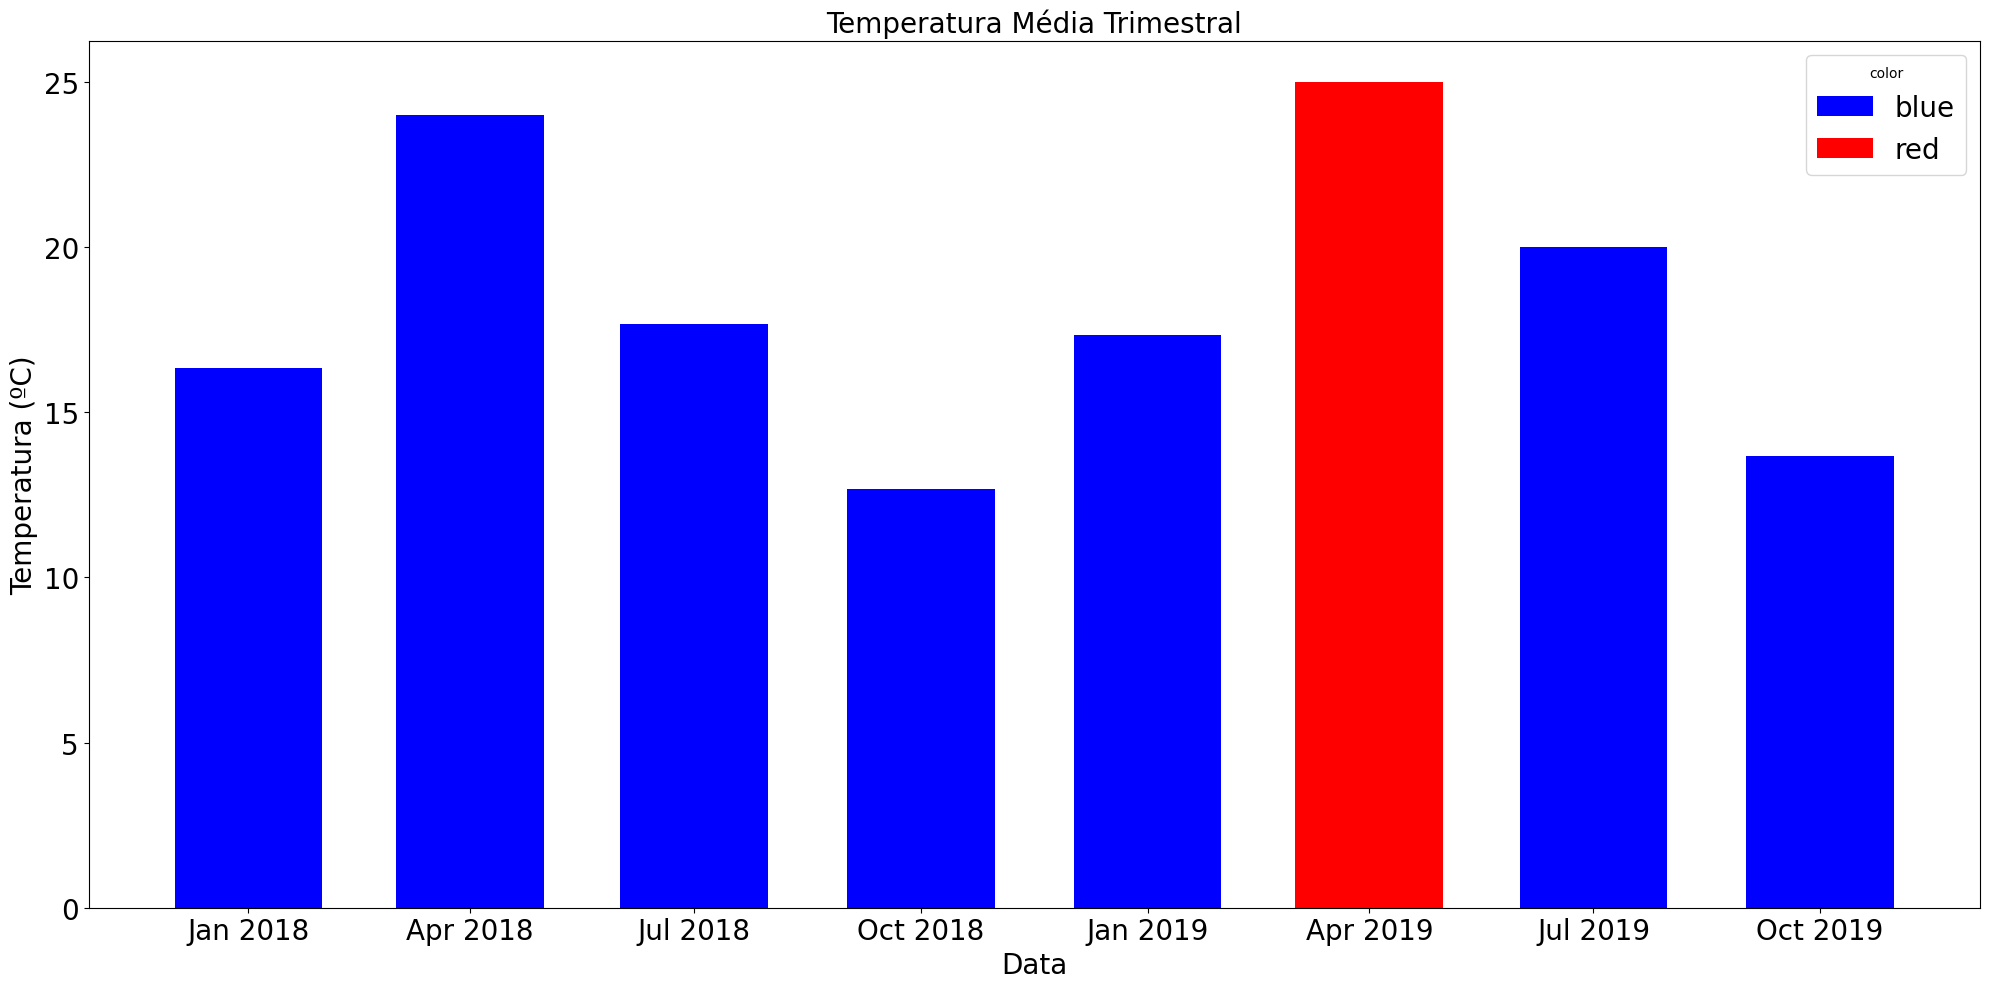

In [454]:
from matplotlib import pyplot as plt

# definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# plotando o gráfico de barras com a temperatura média trimestral usando matplotlib sem a temperatura média mais elevada
plt.bar([x[0] for x in media_trimestral_mod], [x[1] for x in media_trimestral_mod], width=60, color='blue')

# adicionando e colorindo a temperatura média mais elevada em vermelho
plt.bar([max(media_trimestral, key=lambda x: x[1])[0]], [max(media_trimestral, key=lambda x: x[1])[1]], width=60, color='red')

# definindo o tamanho da fonte do rótulo do eixo x e y para 20
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

# labels do eixo x com abreviação dos meses e ano
xlabel = [x[0].strftime("%b %Y") for x in media_trimestral]

# adicionando rótulos do eixo x
plt.xticks([x[0] for x in media_trimestral], xlabel)

# adicionado título, nome dos eixos e legenda
plt.title("Temperatura Média Trimestral", fontsize=20)
plt.xlabel("Data", fontsize=20)
plt.ylabel("Temperatura (ºC)", fontsize=20)
plt.legend(title="color", labels=["blue", "red"], fontsize=20)
plt.tight_layout()
plt.show()

# Mínimos e máximos
Dada uma série de valores, representativos da cotação de um ativo ao longo do tempo, pretende-se obter os dias em que ocorreram valores máximos e valores mínimos.
- Note que os valores são máximos e mínimos locais e não absolutos.
- O primeiro valor corresponde ao dia 2019-01-01, o segundo valor ao dia 2019-01-02 e assim sucessivamente.

Por exemplo, dada a seguinte série de valores:

`66.79 66.76 66.62 66.12 65.47 70.12 70.18 70.65 72.07 72.13 73.17 72.83 72.89 75.47 75.91 77.34 77.62 76.89`

In [455]:
serie = "66.79 66.76 66.62 66.12 65.47 70.12 70.18 70.65 72.07 72.13 73.17 72.83 72.89 75.47 75.91 77.34 77.62 76.89"

# criando uma lista com os valores fazendo split no espaço e convertendo para float
valores = [float(x) for x in serie.split(" ")]

valores, len(valores)

([66.79,
  66.76,
  66.62,
  66.12,
  65.47,
  70.12,
  70.18,
  70.65,
  72.07,
  72.13,
  73.17,
  72.83,
  72.89,
  75.47,
  75.91,
  77.34,
  77.62,
  76.89],
 18)

In [456]:
# criando uma lista com os meses e anos com inicio em 1 de Janeiro de 2019, 1 de Fevereiro de 2019, etc
dados = [[item, f"{i+1:02d}-01-2019"] for i, item in enumerate(valores)]
dados

[[66.79, '01-01-2019'],
 [66.76, '02-01-2019'],
 [66.62, '03-01-2019'],
 [66.12, '04-01-2019'],
 [65.47, '05-01-2019'],
 [70.12, '06-01-2019'],
 [70.18, '07-01-2019'],
 [70.65, '08-01-2019'],
 [72.07, '09-01-2019'],
 [72.13, '10-01-2019'],
 [73.17, '11-01-2019'],
 [72.83, '12-01-2019'],
 [72.89, '13-01-2019'],
 [75.47, '14-01-2019'],
 [75.91, '15-01-2019'],
 [77.34, '16-01-2019'],
 [77.62, '17-01-2019'],
 [76.89, '18-01-2019']]

In [457]:
# criando dataFrame a partir dos dados
df = pd.DataFrame(dados, columns=['Cotacao', 'Data'])

# Calculando máximos e mínimos locais
df['Maximo_Local'] = df['Cotacao'][(df['Cotacao'].shift(1) < df['Cotacao']) & (df['Cotacao'].shift(-1) < df['Cotacao'])]
df['Minimo_Local'] = df['Cotacao'][(df['Cotacao'].shift(1) > df['Cotacao']) & (df['Cotacao'].shift(-1) > df['Cotacao'])]

df

,Cotacao,Data,Maximo_Local,Minimo_Local
0,66.79,01-01-2019,NaN,NaN
1,66.76,02-01-2019,NaN,NaN
2,66.62,03-01-2019,NaN,NaN
3,66.12,04-01-2019,NaN,NaN
4,65.47,05-01-2019,NaN,65.47
5,70.12,06-01-2019,NaN,NaN
6,70.18,07-01-2019,NaN,NaN
7,70.65,08-01-2019,NaN,NaN
8,72.07,09-01-2019,NaN,NaN
9,72.13,10-01-2019,NaN,NaN


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cotacao       18 non-null     float64
 1   Data          18 non-null     object 
 2   Maximo_Local  2 non-null      float64
 3   Minimo_Local  2 non-null      float64
dtypes: float64(3), object(1)
memory usage: 704.0+ bytes


In [459]:
# convertendo a coluna Data para datetime no formato dia-mês-ano
df.Data = pd.to_datetime(df.Data, format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Cotacao       18 non-null     float64       
 1   Data          18 non-null     datetime64[ns]
 2   Maximo_Local  2 non-null      float64       
 3   Minimo_Local  2 non-null      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 704.0 bytes


In [460]:
df.columns

Index(['Cotacao', 'Data', 'Maximo_Local', 'Minimo_Local'], dtype='object')

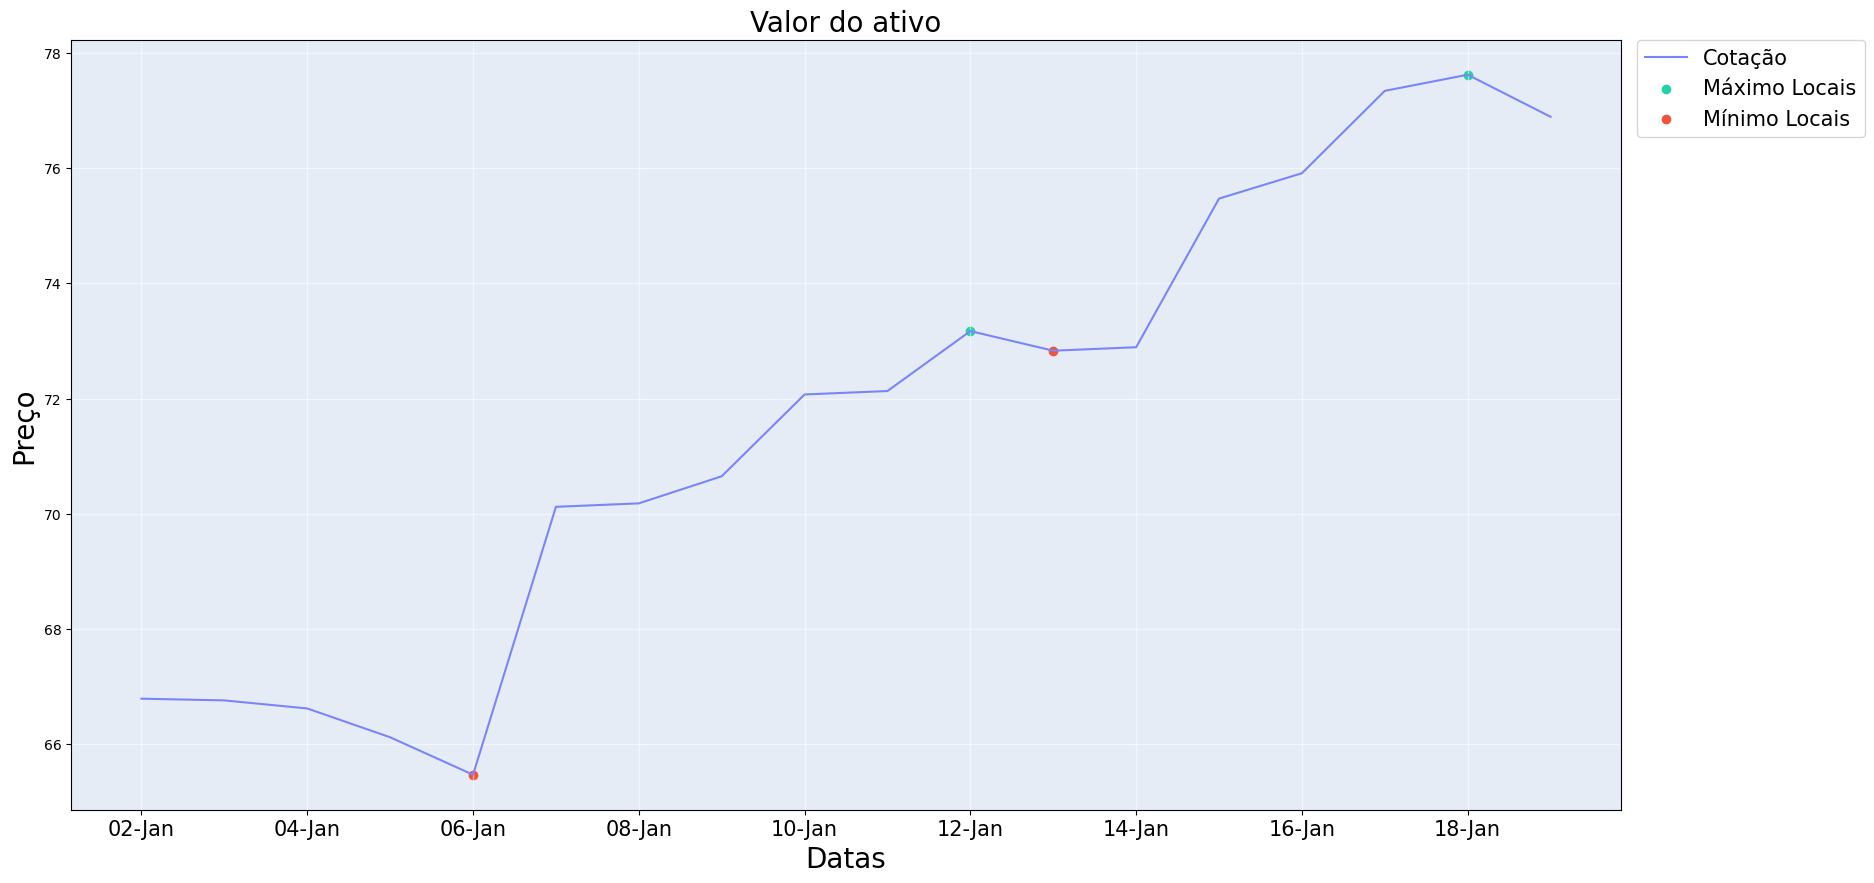

In [461]:
# definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# criando o gráfico de linha
plt.plot(range(0, len(df)), df.Cotacao, label='Cotação', color='#7a85fa')
plt.scatter(range(0, len(df)), df.Maximo_Local, color='#25d1a6', label='Máximo Locais')
plt.scatter(range(0, len(df)), df.Minimo_Local, color='#ef553b', label='Mínimo Locais')

# rótulos do eixo x com abreviação dos meses e ano
xlabel = [x.strftime('%d-%b') for x in df.Data]

# saltando de 2 em 2 para não ficar muito apertado
plt.xticks(range(0, len(df), 2), xlabel[1::2], fontsize=15)

# rótulos dos eixos x e y
plt.xlabel('Datas', fontsize=20)
plt.ylabel('Preço', fontsize=20)

# título do gráfico e legenda
plt.title('Valor do ativo', fontsize=20)
plt.legend(['cotação', 'máximo', 'mínimo'])

# legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0., fontsize=15)

# adicionando grid com background azul esmaecido e linhas brancas
plt.gca().set_facecolor('#e5ecf6')
plt.grid(color='white', alpha=0.5, linestyle='-', linewidth=1)
plt.show()